<a href="https://colab.research.google.com/github/MuchereShawn/Mammal-Non-mammalDT/blob/main/AnimalsDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus


In [2]:
data=pd.read_csv('/content/animals.csv', header='infer')

In [3]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [6]:
#columns to feature apart from Sr and Class
features = data.columns[1:-1]
X = data[features]
# Assumption of 1 reps mammals and 0 non-mammals
y = data['Class'].apply(lambda x: 1 if x == 1 else 0)


In [7]:
 #Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
# Initialize and train the Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
# Make predictions
y_pred = clf.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [36]:
class_report = classification_report(y_test, y_pred)

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [38]:
accuracy

1.0

In [28]:
class_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        14\n           1       1.00      1.00      1.00        13\n\n    accuracy                           1.00        27\n   macro avg       1.00      1.00      1.00        27\nweighted avg       1.00      1.00      1.00        27\n'

In [29]:
conf_matrix

array([[14,  0],
       [ 0, 13]])

In [58]:
from IPython.display import Image

In [59]:
clf.fit(X, y) # Train the decision tree classifier

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [60]:
dot_data=tree.export_graphviz(clf, feature_names=features, class_names=['Non-Mammal', 'Mammal'], filled=True)

In [61]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=" Milk <= 0.5\\nentropy = 0.977\\nsamples = 90\\nvalue = [53, 37]\\nclass = Non-Mammal", fillcolor="#f7d9c3"] ;\n1 [label="entropy = 0.0\\nsamples = 53\\nvalue = [53, 0]\\nclass = Non-Mammal", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 37\\nvalue = [0, 37]\\nclass = Mammal", fillcolor="#399de5"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [62]:
graph=pydotplus.graph_from_dot_data(dot_data)

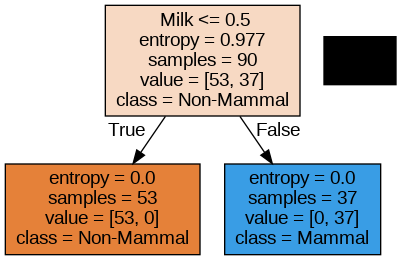

In [63]:
graph

Image(graph.create_png())

In [24]:
determinant_features = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)

In [25]:
determinant_features

 Milk        1.0
 Hair        0.0
 Feathers    0.0
 Eggs        0.0
 Airborne    0.0
 Aquatic     0.0
 Predator    0.0
 Teeth       0.0
 Backbone    0.0
 Breathes    0.0
 Venemous    0.0
 Fins        0.0
 Legs        0.0
 Tails       0.0
 Domestic    0.0
 Catsize     0.0
dtype: float64

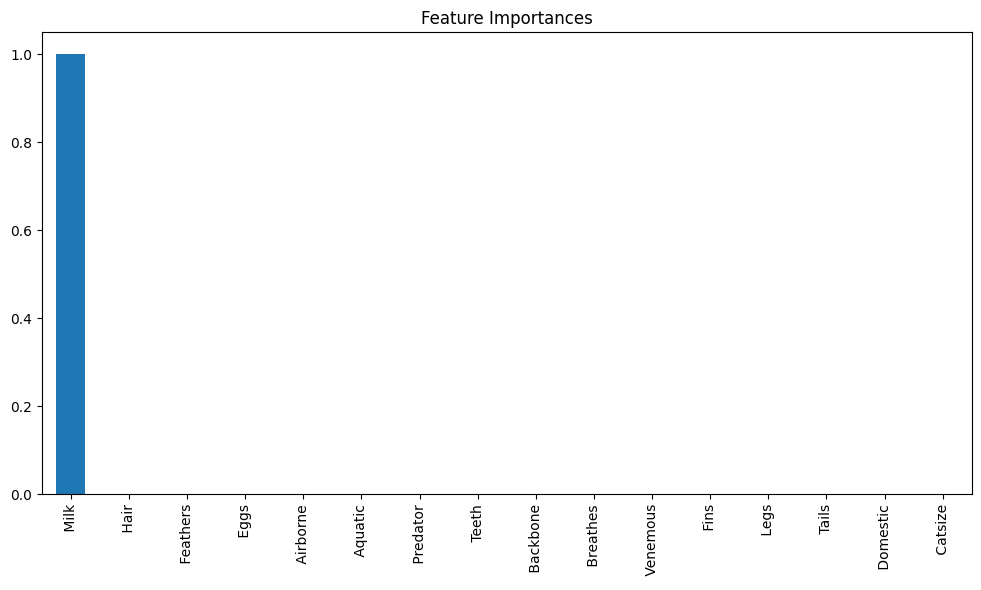

In [26]:
plt.figure(figsize=(12,6))
determinant_features.plot(kind='bar')
plt.title('Feature Importances')
plt.show()